Formative Assignment: Street network analysis
-------------------------------
For this formative assessment, your objective is to develop a GitHub page that conducts a street network analysis of a London
neighborhood of your preference. Keep in mind that since this is a formative assessment, there won’t be any grades given,
however, it will serve as valuable practice for the forthcoming summative assessment.

### Task 1: Investigating the Relationship Between Retail Locations and Street Networks

For this task, I have chosen to center my exploration around **Holloway Road Station**, examining the relationship between the road network within a radius of 2000 meters and retail establishments. The primary focus of this study involves the analysis of the **driving network** within the designated research area.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import contextily as ctx

In this study, all data are sourced from OpenStreetMap. Relevant functions from the **OSMnx** are employed to retrieve the street network map around Holloway Road, and **NetworkX** is utilized for subsequent analysis. For the obtained road network, initial visualization and exploration are conducted using the **explore** function from the **GeoPandas**.

In [2]:
G=ox.graph_from_address('Holloway Road, London', dist=2000, network_type='drive')

# Convert the graph G to GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# Use the 'explore' method to create and display the map
Base_map = gdf_edges.explore(color='red')
Base_map

Based on the foundational insights from the interactive map, further simple statistical analysis is performed on the acquired road network data: the research area encompasses a total of 1664 nodes and 2744 edges. The average street length is 85 meters, with an average street count of 2.61 per node.

In [3]:
stats = ox.basic_stats(G)
stats

{'n': 2138,
 'm': 4952,
 'k_avg': 4.632366697848457,
 'edge_length_total': 432022.5349999992,
 'edge_length_avg': 87.24203049273005,
 'streets_per_node_avg': 2.610383536014967,
 'streets_per_node_counts': {0: 0, 1: 474, 2: 71, 3: 1413, 4: 174, 5: 6},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.22170252572497662,
  2: 0.03320860617399439,
  3: 0.6608980355472404,
  4: 0.0813844714686623,
  5: 0.002806361085126286},
 'intersection_count': 1664,
 'street_length_total': 233709.94700000025,
 'street_segment_count': 2744,
 'street_length_avg': 85.1712634839651,
 'circuity_avg': 1.0558203843508747,
 'self_loop_proportion': 0.0010932944606413995}

In order to further explore the spatial distribution of the street network within the research area, **Closeness Centrality** and **Betweenness Centrality** methods are employed to measure centrality. The former is utilized to analyze the geometric center of the street network, while the latter is employed to assess the movement potential of streets. This study applies both methods at the **edge level**, as centrality is calculated on the streets, and node level analysis may not yield highly meaningful results.

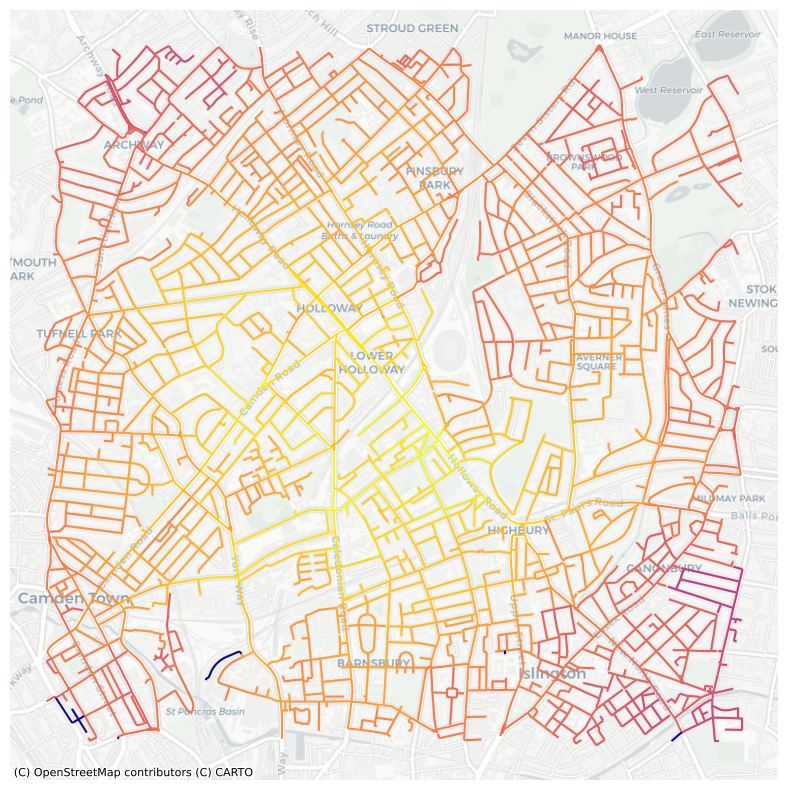

In [4]:
DG = ox.get_digraph(G)

edge_cc = nx.closeness_centrality(nx.line_graph(DG))
nx.set_edge_attributes(DG, edge_cc,'cc')
G1 = nx.MultiGraph(DG)

# convert graph to geopandas dataframe
gdf_edges = ox.graph_to_gdfs(G1,nodes=False,fill_edge_geometry=True)
gdf_edges = gdf_edges.to_crs(epsg=3857) # setting crs to 3857
ax=gdf_edges.plot('cc',cmap='plasma',figsize=(10,10))

# add a basemap using contextilly
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.axis('off')
plt.show()

The above figure illustrates the Closeness Centrality of the road network within the research area. Roads with a more yellowish hue indicate proximity to other locations, positioning them at the center of the road network. Specifically, the streets around **Holloway Road Station** and the intersection of **Caledonian Road and Market Road** are highlighted in yellow, signifying their central positions within the studied road network. 
Upon comparison with the interactive map, it is observed that Closeness Centrality does not exert a significant influence on the presence of roadside retail businesses. In other words, retail establishments do not necessarily tend to be located in areas with high Closeness Centrality in this study area.

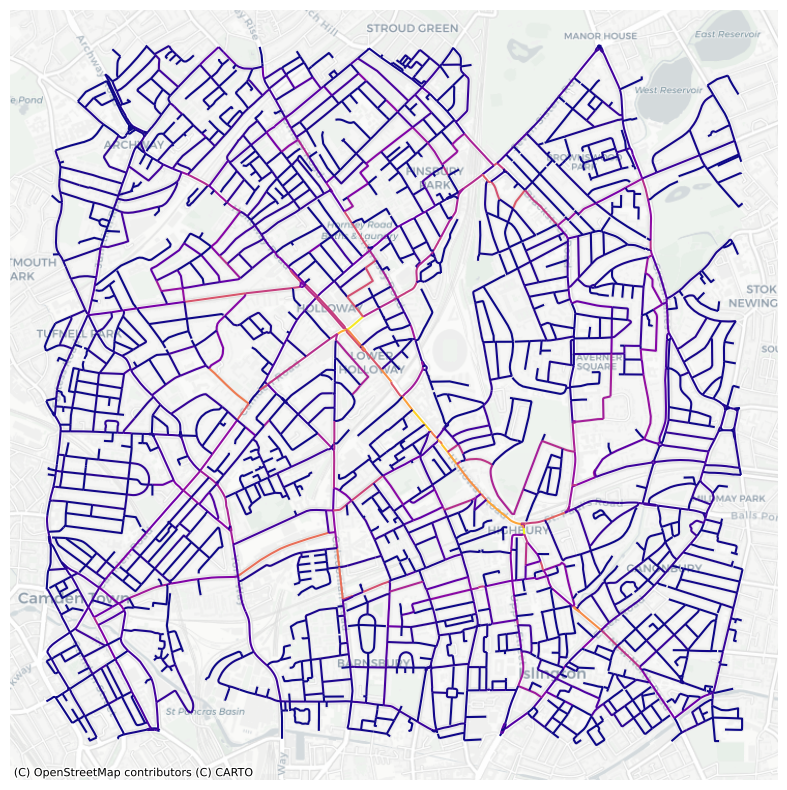

In [5]:
edge_bc = nx.betweenness_centrality(nx.line_graph(DG))
nx.set_edge_attributes(DG, edge_bc,'bc')
G1 = nx.MultiGraph(DG)

# convert graph to geopandas dataframe
gdf_edges = ox.graph_to_gdfs(G1,nodes=False,fill_edge_geometry=True)
gdf_edges = gdf_edges.to_crs(epsg=3857) # setting crs to 3857
ax=gdf_edges.plot('bc',cmap='plasma',figsize=(10,10))

# add a basemap using contextilly
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.axis('off')
plt.show()

The above figure presents the Betweenness Centrality of the road network within the research area. Betweenness Centrality to some extent reflects the frequency with which a street lies on the shortest paths between other streets in the road network, indicating the significance of a street in handling traffic flow within the network.
 One of the streets with the highest Betweenness Centrality in the above figure is situated at the intersection of **Holloway Road and Camdon Road**, as illustrated in the interactive map below. On either side of this road are major supermarkets such as Waitrose, Morrisons, Lidl, as well as a variety of retail stores, highlighting its crucial role in accommodating traffic flow and commercial activity.

In [6]:
G=ox.graph_from_address('Waitrose,Holloway Road, London', dist=100, network_type='drive')
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
Base_map = gdf_edges.explore(color='yellow')
Base_map

Another street exhibiting exceptionally high Betweenness Centrality is located near the three-way intersection of **Highbury Corner, Canonbury Road, and St. Paul's Road**. The interactive map below illustrates that this street is flanked by a series of food-related retail stores and small to medium-sized supermarkets.

In [7]:
G=ox.graph_from_address('Highbury Island, London', dist=100, network_type='drive')
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
Base_map = gdf_edges.explore(color='yellow')
Base_map

Through the map displaying street Betweenness Centrality above, along with the corroborating evidence from the two local interactive maps, it is evident that Betweenness Centrality to some extent effectively illustrates the relationship between retail locations and the road network. Specifically, retail establishments tend to be situated in close proximity to streets with higher Betweenness Centrality.

### Task 2: Finding the Shortest Path

The objective of this task is to explore the shortest path between the origin point: **Caledonian Road**, and the destination point: **Emirates Stadium**. 
The rationale behind investigating this route is that Emirates Stadium, as one of the prominent large sports stadium in North London, regularly hosts football matches, attracting a substantial number of football enthusiasts. Despite Holloway Station serving as the closest underground station to the stadium and handling significant transportation duties before and after matches, it is often closed due to overwhelming pedestrian traffic. onsequently, there is a need to identify an alternative transportation hub, and Caledonian Road serves as a viable option. 
In order to mitigate the impact of heavy pedestrian traffic on the surrounding neighborhoods, planning a shortest path becomes essential, allowing fans to reach the stadium swiftly for match viewing or facilitating a rapid return to the subway station after the conclusion of the match.

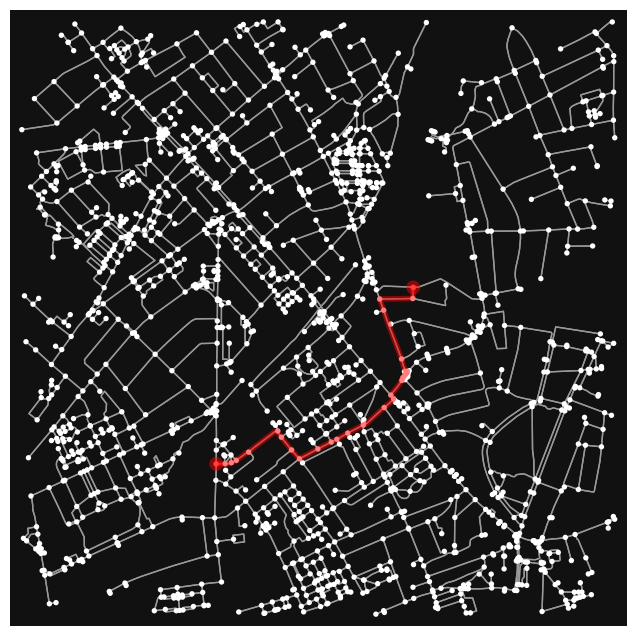

In [8]:
origin_point = ox.geocode('Caledonian Road,London,UK')
destination_point = ox.geocode('Emirates Stadium,London,UK')
G=ox.graph_from_address('Holloway Road, London', dist=1000, network_type='walk')

origin_node = ox.nearest_nodes(G, origin_point[1],origin_point[0])
destination_node = ox.nearest_nodes(G, destination_point[1],destination_point[0])

route = nx.shortest_path(G, origin_node, destination_node, weight='length')
fig,ax = ox.plot_graph_route(G, route )